<a href="https://colab.research.google.com/github/af-pedro/Reverse-Logistics-Data-Analysis-Project-with-Python-and-Power-BI/blob/main/Logistic_Sintetic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalando paocte

!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.2 MB/s eta 0:00:00


**Tentativa 1**

In [ ]:
# Baixando pacotes

import random
import pandas as pd
from faker import Faker
from datetime import timedelta

fake = Faker()

In [ ]:
# Base
make = ['BEKO', 'LG', 'Samsung', 'Bosch', 'Electrolux', 'AEG', 'Gorenje', 'Bauknecht', 'Siemens']
operators = ['SENJICA', 'TOMAS', 'LUIZA', 'MARIO', 'IVANA']
customer_ord_prefix = 'XDT1'
customer_ref_prefix = 'LPNXX'
status_options = ['repair', 'liquidation', 'destroy']
loc = ['WGENG', 'WGASP', 'WGLIQ', 'WGDESTROY']

In [ ]:
# Gerador de entrada
def gerar_ticket():
    marca = random.choice(make)
    cust_p = fake.bothify(text='BOB?????##')
    our_part = str(fake.random_number(digits=10, fix_len=True))
    serial = our_part + str(random.randint(1000000000, 9999999999))
    cust_ord = f'{customer_ord_prefix} – {random.randint(1000, 9999)}'
    cust_ref = f'{customer_ref_prefix}{random.randint(100000,999999)}'
    operador = random.choice(operators)
    csp = round(random.uniform(200.00, 300.00), 2)
    pallet = random.randint(260000, 270000)
    peso = round(random.uniform(25.0, 40.0), 2)
    loc = random.choice(loc)

    data_entrada = fake.date_between(start_date='-180d', end_date='today')
    dias_reparo = random.randint(1, 30)
    data_saida = data_entrada + timedelta(days=dias_reparo)

    # Define status_options within the function
    status_options = ['Reparado', 'Não Reparado']
    status = random.choices(status_options, weights=[0.7, 0.3])[0]  # 70% reparado


 # Corrected indentation for the return statement and dictionary
    return {
        'make': marca,
        'cust_p': cust_p,
        'our_part': our_part,
        'serial_no': serial,
        'cust_ord': cust_ord,
        'cust_ref': cust_ref,
        'operator': operador,
        'csp': csp,
        'pallet': pallet,
        'peso_kg': peso,
        'data_entrada': data_entrada,
        'data_saida': data_saida,
        'status': status
    }


In [ ]:
# Gerar 100 registros
df_tickets = pd.DataFrame([gerar_ticket() for _ in range(1000)])

In [ ]:
# Visualizar
print(df_tickets.head())

      make      cust_p    our_part             serial_no     cust_ord  \
0      AEG  BOBGTvwa03  9347376176  93473761762555025268  XDT1 – 9974   
1      AEG  BOBNyyeO03  6140653933  61406539338179688055  XDT1 – 8401   
2  Samsung  BOBfGpVE25  9245914618  92459146182304132115  XDT1 – 1056   
3      AEG  BOBhMjNw99  3276936350  32769363504637660400  XDT1 – 1039   
4  Samsung  BOByjhbY20  5853299658  58532996588667555993  XDT1 – 1967   

      cust_ref operator     csp  pallet  peso_kg data_entrada  data_saida  \
0  LPNXX654457    MARIO  235.60  267173    25.94   2025-03-15  2025-04-12   
1  LPNXX610483    MARIO  245.83  269122    32.41   2024-10-28  2024-10-29   
2  LPNXX134845    LUIZA  254.75  266725    31.69   2025-03-28  2025-04-01   
3  LPNXX652787  SENJICA  277.13  269961    33.21   2025-02-25  2025-03-18   
4  LPNXX597315    LUIZA  231.50  269075    36.19   2024-12-13  2025-01-01   

     status  
0  Reparado  
1  Reparado  
2  Reparado  
3  Reparado  
4  Reparado  


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

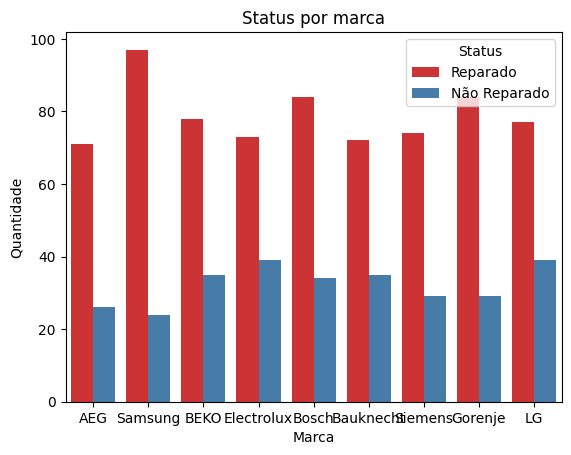

In [ ]:
# Status por marca

sns.countplot(data=df_tickets, x='make', hue='status', palette='Set1')
plt.title('Status por marca')
plt.xlabel('Marca')
plt.ylabel('Quantidade')
plt.legend(title='Status')
plt.show()

<ipython-input-33-187c24c82b6d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tickets, x='status', palette='Set2')


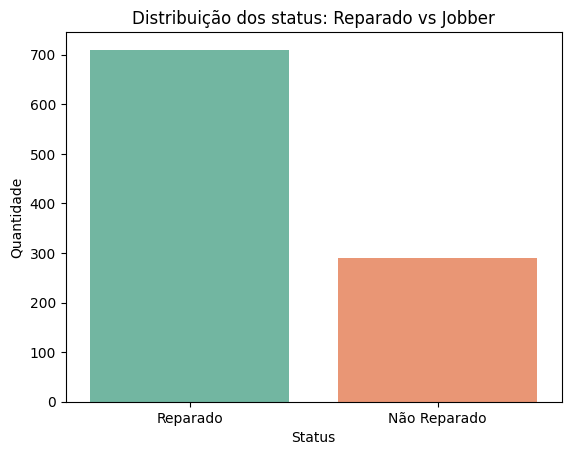

In [ ]:
sns.countplot(data=df_tickets, x='status', palette='Set2')
plt.title('Distribuição dos status: Reparado vs Jobber')
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.show()

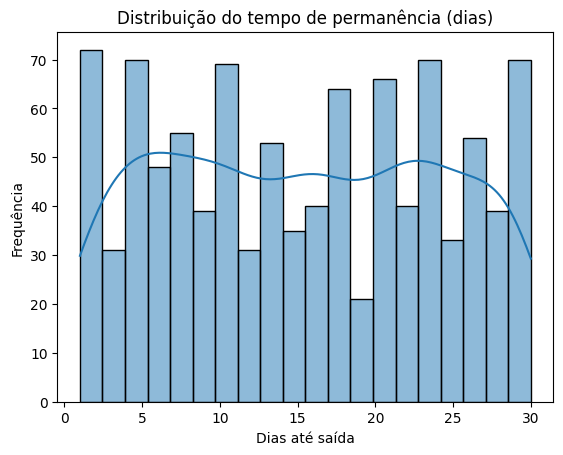

In [ ]:
df_tickets['data_entrada'] = pd.to_datetime(df_tickets['data_entrada'])
df_tickets['data_saida'] = pd.to_datetime(df_tickets['data_saida'])
df_tickets['tempo_reparo'] = (df_tickets['data_saida'] - df_tickets['data_entrada']).dt.days
sns.histplot(df_tickets['tempo_reparo'], bins=20, kde=True)
plt.title('Distribuição do tempo de permanência (dias)')
plt.xlabel('Dias até saída')
plt.ylabel('Frequência')
plt.show()

<ipython-input-36-86ce6fa1e007>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tickets, x='status', y='peso_kg', palette='coolwarm')


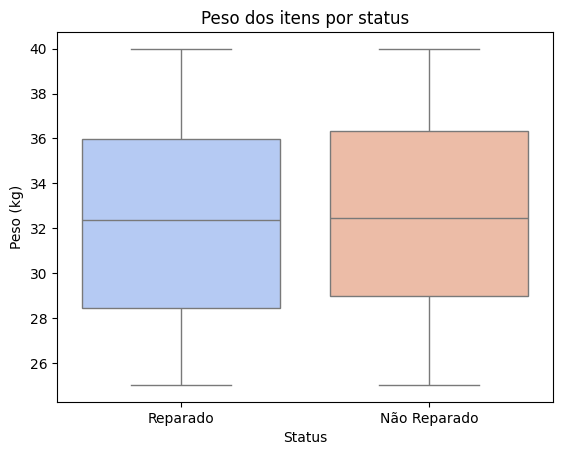

In [ ]:
sns.boxplot(data=df_tickets, x='status', y='peso_kg', palette='coolwarm')
plt.title('Peso dos itens por status')
plt.xlabel('Status')
plt.ylabel('Peso (kg)')
plt.show()

In [ ]:
# Salvar em CSV
df_tickets.to_csv('tickets_sinteticos.csv', index=False)

**Tentativa 2**

In [ ]:
fake = Faker()

make = ['BEKO', 'LG', 'Samsung', 'Bosch', 'Electrolux', 'AEG', 'Gorenje', 'Bauknecht', 'Siemens']
operators = ['SENJICA', 'TOMAS', 'LUIZA', 'MARIO', 'IVANA']
customer_ord_prefix = 'XDT1'
customer_ref_prefix = 'LPNXX'
status_options = ['repair', 'liquidation', 'destroy']

# Relação entre status e localização
status_loc_map = {
    'repair': ['WGENG', 'WGASP'],
    'liquidation': ['WGLIQ'],
    'destroy': ['WGDESTROY']
}

def gerar_movimentacoes(base_info, start_date, status):
    movimentos = []
    data_atual = start_date
    setores = status_loc_map[status]

    if status == 'repair':
        num_passos = random.randint(1, len(setores))  # 1 ou 2 setores
        setores_usados = setores[:num_passos]
    else:
        setores_usados = setores  # só um setor

    for setor in setores_usados:
        operador = random.choice(operators)
        dias = random.randint(1, 7)
        data_saida = data_atual + timedelta(days=dias)

        movimento = {
            **base_info,  # inclui make, serial, csp, etc.
            'setor': setor,
            'data_entrada': data_atual,
            'data_saida': data_saida,
            'operador': operador,
            'status': status
        }

        movimentos.append(movimento)
        data_atual = data_saida

    return movimentos

# Lista de todos os registros temporais
dados_temporais = []

for _ in range(100):
    marca = random.choice(make)
    cust_p = fake.bothify(text='BOB?????##')
    our_part = str(fake.random_number(digits=10, fix_len=True))
    serial = our_part + str(random.randint(1000000000, 9999999999))
    cust_ord = f'{customer_ord_prefix}-{random.randint(1000, 9999)}'
    cust_ref = f'{customer_ref_prefix}{random.randint(100000,999999)}'
    csp = round(random.uniform(50.00, 1000.00), 2)
    pallet = random.randint(260000, 270000)
    peso = round(random.uniform(10.0, 70.0), 2)

    status = random.choices(status_options, weights=[0.7, 0.2, 0.1])[0]
    data_inicio = fake.date_between(start_date='-180d', end_date='today')

    base_info = {
        'make': marca,
        'cust_p': cust_p,
        'our_part': our_part,
        'serial_no': serial,
        'cust_ord': cust_ord,
        'cust_ref': cust_ref,
        'csp': csp,
        'pallet': pallet,
        'peso_kg': peso
    }

    registros = gerar_movimentacoes(base_info, data_inicio, status)
    dados_temporais.extend(registros)

# Converter para DataFrame
df_temporal = pd.DataFrame(dados_temporais)

# Visualizar exemplo
print(df_temporal.head())


      make      cust_p    our_part             serial_no   cust_ord  \
0      AEG  BOByAVuc46  7209902236  72099022369136662875  XDT1-4474   
1      AEG  BOByAVuc46  7209902236  72099022369136662875  XDT1-4474   
2       LG  BOBWTker04  6636602732  66366027322255870922  XDT1-4081   
3  Gorenje  BOBldzRy91  5834506413  58345064136275785432  XDT1-7172   
4  Gorenje  BOBnkGBd08  6298631944  62986319448191428743  XDT1-6537   

      cust_ref     csp  pallet  peso_kg      setor data_entrada  data_saida  \
0  LPNXX199500  171.72  265448    36.76      WGENG   2025-02-12  2025-02-13   
1  LPNXX199500  171.72  265448    36.76      WGASP   2025-02-13  2025-02-16   
2  LPNXX491747  155.73  268712    11.47      WGLIQ   2024-11-15  2024-11-20   
3  LPNXX290926  840.45  267964    17.08      WGLIQ   2024-12-18  2024-12-25   
4  LPNXX310155  715.09  261175    43.31  WGDESTROY   2024-12-19  2024-12-20   

  operador       status  
0    IVANA       repair  
1    MARIO       repair  
2    LUIZA  liquidat

**Tentativa 3**

In [ ]:
import random
import pandas as pd
from faker import Faker
from datetime import timedelta, datetime

fake = Faker()

In [ ]:
# Fixed parameters
brands = ['BEKO', 'LG', 'Samsung', 'Bosch', 'Electrolux', 'AEG', 'Gorenje', 'Bauknecht', 'Siemens']
product_types = ['Fridge', 'TV', 'Dishwasher', 'Microwave', 'Washing Machine', 'Dryer']
operators = ['SENJICA', 'TOMAS', 'LUIZA', 'MARIO', 'IVANA']
customer_order_prefix = 'XDT1'
customer_ref_prefix = 'LPNXX'
status_options = ['repair', 'liquidation', 'destroy']  # liquidation and jobber are now merged
status_to_location = {
    'repair': ['WGENG', 'WGASP'],
    'liquidation': ['WGLIQ'],  # liquidation treated as jobber
    'destroy': ['WGDESTROY']
}
result_options = ['repaired', 'jobber']  # 'jobber' now represents liquidation

# Ticket generator
def generate_ticket(base_date):
    brand = random.choice(brands)
    product = random.choice(product_types)
    customer_product = fake.bothify(text='BOB?????##')
    our_part = str(fake.random_number(digits=10, fix_len=True))
    serial_number = our_part + str(random.randint(1000000000, 9999999999))
    customer_order = f'{customer_order_prefix}-{random.randint(1000, 9999)}'
    customer_reference = f'{customer_ref_prefix}{random.randint(100000,999999)}'
    operator = random.choice(operators)
    csp = round(random.uniform(100.00, 900.00), 2)
    pallet = random.randint(260000, 270000)
    weight_kg = round(random.uniform(20.0, 70.0), 2)

    # Entry and exit dates
    entry_date = base_date
    repair_days = random.randint(1, 5)
    exit_date = entry_date + timedelta(days=repair_days)

    # Status and location
    status = random.choice(status_options)
    location = random.choice(status_to_location[status])

    # Repair cost (if applicable)
    repair_cost = round(random.uniform(15.0, 120.0), 2) if status == 'repair' else 0.0

    # Final result (only for repairs)
    if status == 'repair':
        result = random.choices(result_options, weights=[0.7, 0.3])[0]
    elif status == 'destroy':
        result = 'destroyed'
    elif status == 'liquidation':
        result = 'jobber'

    return {
        'entry_date': entry_date,
        'exit_date': exit_date,
        'brand': brand,
        'product_type': product,
        'customer_product': customer_product,
        'our_part': our_part,
        'serial_number': serial_number,
        'customer_order': customer_order,
        'customer_reference': customer_reference,
        'operator': operator,
        'csp': csp,
        'pallet': pallet,
        'weight_kg': weight_kg,
        'status': status,
        'location': location,
        'repair_cost': repair_cost,
        'final_result': result
    }

# Generate data for one week (e.g., 200 tickets per day)
def generate_week_data(tickets_per_day=200):
    start_date = datetime.today().date() - timedelta(days=6)
    records = []

    for i in range(7):  # 7 days in a week
        base_date = start_date + timedelta(days=i)
        for _ in range(tickets_per_day):
            records.append(generate_ticket(base_date))

    df = pd.DataFrame(records)
    return df

# Create the DataFrame
weekly_df = generate_week_data()


In [ ]:
print(weekly_df)

      entry_date   exit_date       brand     product_type customer_product  \
0     2025-04-25  2025-04-28        BEKO               TV       BOBjjeeA45   
1     2025-04-25  2025-04-29        BEKO        Microwave       BOBhPNaI41   
2     2025-04-25  2025-04-29          LG  Washing Machine       BOBedSau97   
3     2025-04-25  2025-04-30     Samsung  Washing Machine       BOBRkFCK34   
4     2025-04-25  2025-04-26         AEG               TV       BOBJRRVI00   
...          ...         ...         ...              ...              ...   
1395  2025-05-01  2025-05-05         AEG  Washing Machine       BOBoLUyx47   
1396  2025-05-01  2025-05-04     Gorenje  Washing Machine       BOBgWMPv66   
1397  2025-05-01  2025-05-05     Samsung               TV       BOBZuZvm52   
1398  2025-05-01  2025-05-06     Gorenje           Fridge       BOBffluU38   
1399  2025-05-01  2025-05-02  Electrolux               TV       BOBEPAFt10   

        our_part         serial_number customer_order customer_

In [ ]:
df_week = generate_week_data()  # Gera o DataFrame com os tickets
df_week.to_csv('logistics_tickets_week.csv', index=False, float_format='%.2f')  # Salva como CSV


**Tentativa 4**

In [ ]:
import random
from datetime import datetime, timedelta
import pandas as pd
from faker import Faker

# Inicializa o Faker
fake = Faker()

# Parâmetros fixos
brands = ['BEKO', 'LG', 'Samsung', 'Bosch', 'Electrolux', 'AEG', 'Gorenje', 'Bauknecht', 'Siemens']
product_types = ['Fridge', 'TV', 'Dishwasher', 'Microwave', 'Washing Machine', 'Dryer']
operators = ['SENJICA', 'TOMAS', 'LUIZA', 'MARIO', 'IVANA']
customer_order_prefix = 'XDT1'
customer_ref_prefix = 'LPNXX'
status_options = ['repair', 'liquidation', 'destroy']  # 'liquidation' e 'jobber' são a mesma coisa
status_to_location = {
    'repair': ['WGENG', 'WGASP'],
    'liquidation': ['WGLIQ'],  # trata como jobber
    'destroy': ['WGDESTROY']
}
result_options = ['repaired', 'jobber']  # 'jobber' representa liquidação

# Gerador de tickets
def generate_ticket(base_date):
    brand = random.choice(brands)
    product = random.choice(product_types)
    customer_product = fake.bothify(text='BOB?????##')
    our_part = str(fake.random_number(digits=10, fix_len=True))
    serial_number = our_part + str(random.randint(1000000000, 9999999999))
    customer_order = f'{customer_order_prefix}-{random.randint(1000, 9999)}'
    customer_reference = f'{customer_ref_prefix}{random.randint(100000,999999)}'
    operator = random.choice(operators)
    csp = round(random.uniform(100.00, 900.00), 2)
    pallet = random.randint(260000, 270000)
    weight_kg = round(random.uniform(20.0, 70.0), 2)

    # Datas de entrada e saída
    entry_date = base_date
    repair_days = random.randint(1, 5)
    exit_date = entry_date + timedelta(days=repair_days)

    # Status e local
    status = random.choice(status_options)
    location = random.choice(status_to_location[status])

    # Custo de reparo
    #repair_cost = round(random.uniform(15.0, 120.0), 2) if status == 'repair' elif status == 'destroy':
        #result = 'destroyed'
    #elif status == 'liquidation':
       # result = 'jobber'

    if status == 'repair':
      repair_cost = round(random.uniform(15.0, 120.0), 2)
    elif status == 'liquidation':
      jobber_cost = repair_cost / 2
    elif status == 'destroy':
      destroy_cost = repair_cost * 0.375

    # Resultado final
    if status == 'repair':
        result = random.choices(result_options, weights=[0.7, 0.3])[0]
    elif status == 'destroy':
        result = 'destroyed'
    elif status == 'liquidation':
        result = 'jobber'

    return {
        'entry_date': entry_date,
        'exit_date': exit_date,
        'brand': brand,
        'product_type': product,
        'customer_product': customer_product,
        'our_part': our_part,
        'serial_number': serial_number,
        'customer_order': customer_order,
        'customer_reference': customer_reference,
        'operator': operator,
        'csp': csp,
        'pallet': pallet,
        'weight_kg': weight_kg,
        'status': status,
        'location': location,
        'repair_cost': repair_cost,
        'final_result': result
    }

# Gera dados para uma semana
def generate_week_data(tickets_per_day=200):
    start_date = datetime.today().date() - timedelta(days=6)
    records = []

    for i in range(7):  # 7 dias
        base_date = start_date + timedelta(days=i)
        for _ in range(tickets_per_day):
            records.append(generate_ticket(base_date))

    df = pd.DataFrame(records)

    # Adiciona a coluna de custo estimado com base no resultado final
    df['estimated_cost'] = df.apply(
        lambda row: row['repair_cost'] if row['final_result'] == 'repaired' else
                    row['repair_cost'] / 2 if row['final_result'] == 'jobber' else
                    row['repair_cost'] * 0.375,
        axis=1
    )

    return df

# Cria o DataFrame
weekly_df = generate_week_data()
print(weekly_df.head())  # Mostra os primeiros registros


   entry_date   exit_date      brand     product_type customer_product  \
0  2025-04-26  2025-04-29    Gorenje            Dryer       BOBFgOcm64   
1  2025-04-26  2025-05-01    Siemens  Washing Machine       BOBbLssQ78   
2  2025-04-26  2025-04-29  Bauknecht        Microwave       BOBLMTJa82   
3  2025-04-26  2025-04-27    Gorenje        Microwave       BOBAIXQe08   
4  2025-04-26  2025-05-01        AEG            Dryer       BOBTwhSd17   

     our_part         serial_number customer_order customer_reference  \
0  1642219516  16422195169303712628      XDT1-9393        LPNXX262595   
1  5385934853  53859348534117242838      XDT1-2126        LPNXX324840   
2  4931193775  49311937759945643427      XDT1-1252        LPNXX872025   
3  1529449822  15294498228860569911      XDT1-6475        LPNXX506939   
4  5947220964  59472209647405191321      XDT1-7612        LPNXX600297   

  operator     csp  pallet  weight_kg       status location  repair_cost  \
0    TOMAS  695.48  268656      47.07  l

In [ ]:
print(weekly_df)

      entry_date   exit_date       brand     product_type customer_product  \
0     2025-04-26  2025-04-29     Gorenje            Dryer       BOBFgOcm64   
1     2025-04-26  2025-05-01     Siemens  Washing Machine       BOBbLssQ78   
2     2025-04-26  2025-04-29   Bauknecht        Microwave       BOBLMTJa82   
3     2025-04-26  2025-04-27     Gorenje        Microwave       BOBAIXQe08   
4     2025-04-26  2025-05-01         AEG            Dryer       BOBTwhSd17   
...          ...         ...         ...              ...              ...   
1395  2025-05-02  2025-05-04         AEG           Fridge       BOBuhGfR02   
1396  2025-05-02  2025-05-05        BEKO           Fridge       BOBkzsPI65   
1397  2025-05-02  2025-05-06         AEG        Microwave       BOBCPcJY25   
1398  2025-05-02  2025-05-04         AEG            Dryer       BOBsgouh80   
1399  2025-05-02  2025-05-07  Electrolux  Washing Machine       BOBIWwdN93   

        our_part         serial_number customer_order customer_

**Tentativa 5**

In [ ]:
import random
from datetime import datetime, timedelta
import pandas as pd
from faker import Faker

# Inicializa o Faker
fake = Faker()

# Parâmetros fixos
brands = ['BEKO', 'LG', 'Samsung', 'Bosch', 'Electrolux', 'AEG', 'Gorenje', 'Bauknecht', 'Siemens']
product_types = ['Fridge', 'TV', 'Dishwasher', 'Microwave', 'Washing Machine', 'Dryer']
operators = ['SENJICA', 'TOMAS', 'LUIZA', 'MARIO', 'IVANA']
customer_order_prefix = 'XDT1'
customer_ref_prefix = 'LPNXX'
status_options = ['repair', 'liquidation', 'destroy']
status_to_location = {
    'repair': ['WGENG', 'WGASP'],
    'liquidation': ['WGLIQ'],
    'destroy': ['WGDESTROY']
}
result_options = ['repaired', 'jobber']

def generate_ticket(base_date):
    brand = random.choice(brands)
    product = random.choice(product_types)
    customer_product = fake.bothify(text='BOB?????##')
    our_part = str(fake.random_number(digits=10, fix_len=True))
    serial_number = our_part + str(random.randint(1000000000, 9999999999))
    customer_order = f'{customer_order_prefix}-{random.randint(1000, 9999)}'
    customer_reference = f'{customer_ref_prefix}{random.randint(100000,999999)}'
    operator = random.choice(operators)
    csp = round(random.uniform(100.00, 900.00), 2)
    pallet = random.randint(260000, 270000)
    weight_kg = round(random.uniform(20.0, 70.0), 2)

    entry_date = base_date
    repair_days = random.randint(1, 5)
    exit_date = entry_date + timedelta(days=repair_days)

    status = random.choice(status_options)
    location = random.choice(status_to_location[status])

    # Valor base de custo para todos os casos
    repair_cost = round(random.uniform(15.0, 120.0), 2)

    # Resultado final
    if status == 'repair':
        result = random.choices(result_options, weights=[0.7, 0.3])[0]
    elif status == 'destroy':
        result = 'destroyed'
    elif status == 'liquidation':
        result = 'jobber'

    return {
        'entry_date': entry_date,
        'exit_date': exit_date,
        'brand': brand,
        'product_type': product,
        'customer_product': customer_product,
        'our_part': our_part,
        'serial_number': serial_number,
        'customer_order': customer_order,
        'customer_reference': customer_reference,
        'operator': operator,
        'csp': csp,
        'pallet': pallet,
        'weight_kg': weight_kg,
        'status': status,
        'location': location,
        'repair_cost': repair_cost,
        'final_result': result
    }

def generate_week_data(tickets_per_day=200):
    start_date = datetime.today().date() - timedelta(days=6)
    records = []

    for i in range(7):
        base_date = start_date + timedelta(days=i)
        for _ in range(tickets_per_day):
            records.append(generate_ticket(base_date))

    df = pd.DataFrame(records)

    df['estimated_cost'] = df.apply(
        lambda row: round(row['repair_cost'], 2) if row['final_result'] == 'repaired' else
                    round(row['repair_cost'] / 2, 2) if row['final_result'] == 'jobber' else
                    round(row['repair_cost'] * 0.375, 2),
        axis=1
    )

    # Formata os valores monetários com símbolo do euro e vírgula como separador decimal
    df['repair_cost'] = df['repair_cost'].apply(lambda x: f"€ {x:.2f}".replace('.', ','))
    df['estimated_cost'] = df['estimated_cost'].apply(lambda x: f"€ {x:.2f}".replace('.', ','))

    return df

# Gera o DataFrame
weekly_df = generate_week_data()
print(weekly_df.head())


   entry_date   exit_date       brand     product_type customer_product  \
0  2025-05-05  2025-05-09     Gorenje       Dishwasher       BOBSxZLZ53   
1  2025-05-05  2025-05-08         AEG           Fridge       BOBUuUAt32   
2  2025-05-05  2025-05-07   Bauknecht  Washing Machine       BOBBvnYb83   
3  2025-05-05  2025-05-10     Gorenje       Dishwasher       BOBCazFE35   
4  2025-05-05  2025-05-07  Electrolux       Dishwasher       BOBBngkk70   

     our_part         serial_number customer_order customer_reference  \
0  7857811675  78578116755575953054      XDT1-1864        LPNXX397060   
1  9802508575  98025085752807158912      XDT1-6446        LPNXX931672   
2  3648943962  36489439629808482775      XDT1-9242        LPNXX241594   
3  9197871764  91978717643502269272      XDT1-4648        LPNXX583047   
4  1761543564  17615435642544793013      XDT1-1704        LPNXX372507   

  operator     csp  pallet  weight_kg       status   location repair_cost  \
0    TOMAS  269.19  268187      6

In [ ]:
df_week = generate_week_data()  # Gera o DataFrame com os tickets
df_week.to_csv('logistics_tickets_week.csv', index=False, float_format='%.2f')  # Salva como CSV

In [ ]:
# Análise de médias e totais de 'estimated_cost' agrupado por 'final_result', 'brand' e 'product_type'
analysis_final_result = weekly_df.groupby(['final_result']).agg(
    total_estimated_cost=('estimated_cost', lambda x: x.str.replace('€ ', '').str.replace(',', '.').astype(float).sum()),  # Total de estimated_cost
    avg_estimated_cost=('estimated_cost', lambda x: x.str.replace('€ ', '').str.replace(',', '.').astype(float).mean())  # Média de estimated_cost
).reset_index()

# Exibindo a análise completa
print(analysis_final_result)

  final_result  total_estimated_cost  avg_estimated_cost
0    destroyed              11420.20           24.350107
1       jobber              21344.36           33.772722
2     repaired              20323.22           67.970635


In [ ]:
# Análise de médias e totais de 'estimated_cost' agrupado por 'final_result', 'brand' e 'product_type'
analysis_brand = weekly_df.groupby(['brand']).agg(
    total_estimated_cost=('estimated_cost', lambda x: x.str.replace('€ ', '').str.replace(',', '.').astype(float).sum()),  # Total de estimated_cost
    avg_estimated_cost=('estimated_cost', lambda x: x.str.replace('€ ', '').str.replace(',', '.').astype(float).mean())  # Média de estimated_cost
).reset_index()

# Exibindo a análise completa
print(analysis_brand)

        brand  total_estimated_cost  avg_estimated_cost
0         AEG               6234.14           36.456959
1        BEKO               5888.70           38.488235
2   Bauknecht               6653.04           40.567317
3       Bosch               6392.07           37.822899
4  Electrolux               6455.35           41.116879
5     Gorenje               5602.77           36.860329
6          LG               5608.86           35.725223
7     Samsung               4927.49           34.457972
8     Siemens               5325.36           39.741493


In [ ]:
# Análise adicional: total de 'estimated_cost' por 'final_result', 'brand' e 'product_type'
analysis_product_type = weekly_df.groupby(['product_type']).agg(
    avg_estimated_cost=('estimated_cost', lambda x: x.str.replace('€ ', '').str.replace(',', '.').astype(float).mean())  # Média de estimated_cost
).reset_index()

# Exibindo o total por resultado (repair, jobber, destroy), marca e tipo de produto
print(analysis_product_type)

      product_type  avg_estimated_cost
0       Dishwasher           35.942851
1            Dryer           40.159270
2           Fridge           36.355830
3        Microwave           37.383766
4               TV           39.422797
5  Washing Machine           38.132172


<ipython-input-25-db77ebebcf71>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='total_estimated_cost', y='brand', hue='final_result', data=analysis, ci=None)


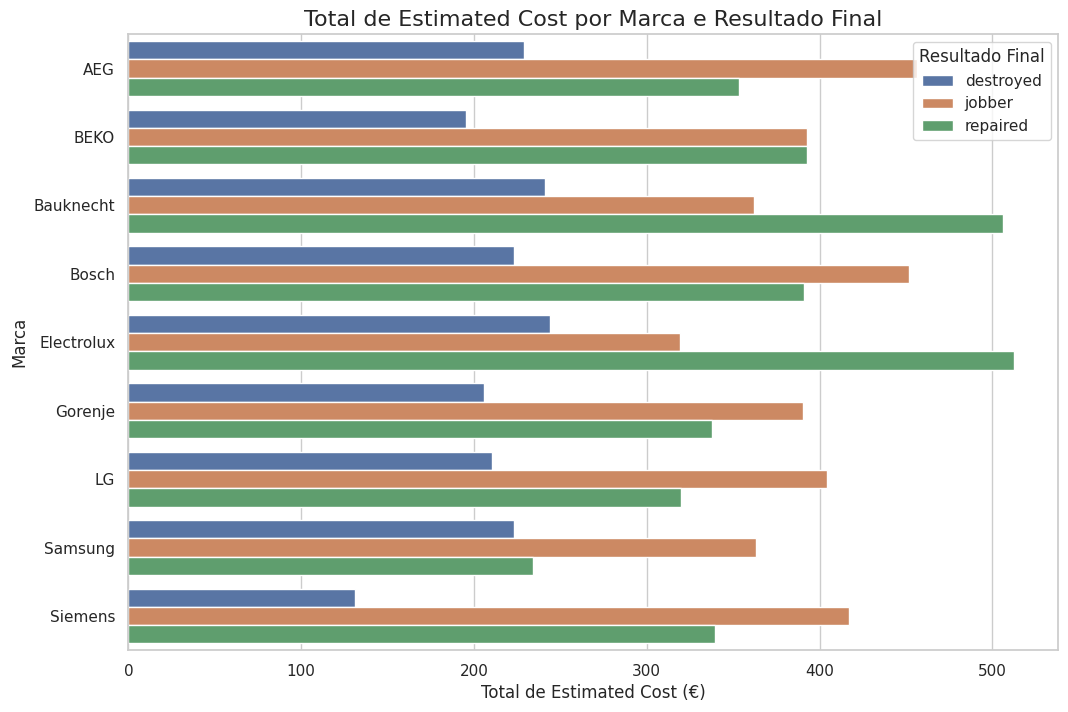

<ipython-input-25-db77ebebcf71>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='total_estimated_cost', y='product_type', hue='final_result', data=analysis, ci=None)


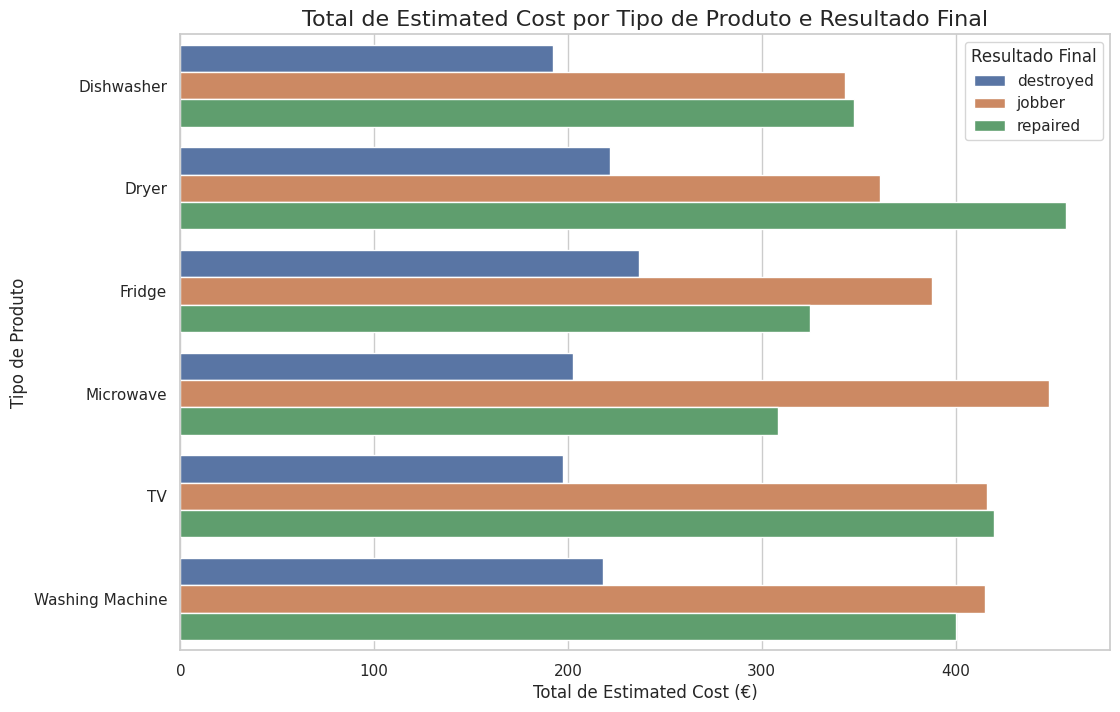

<ipython-input-25-db77ebebcf71>:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='avg_estimated_cost', y='brand', hue='final_result', data=analysis, ci=None)


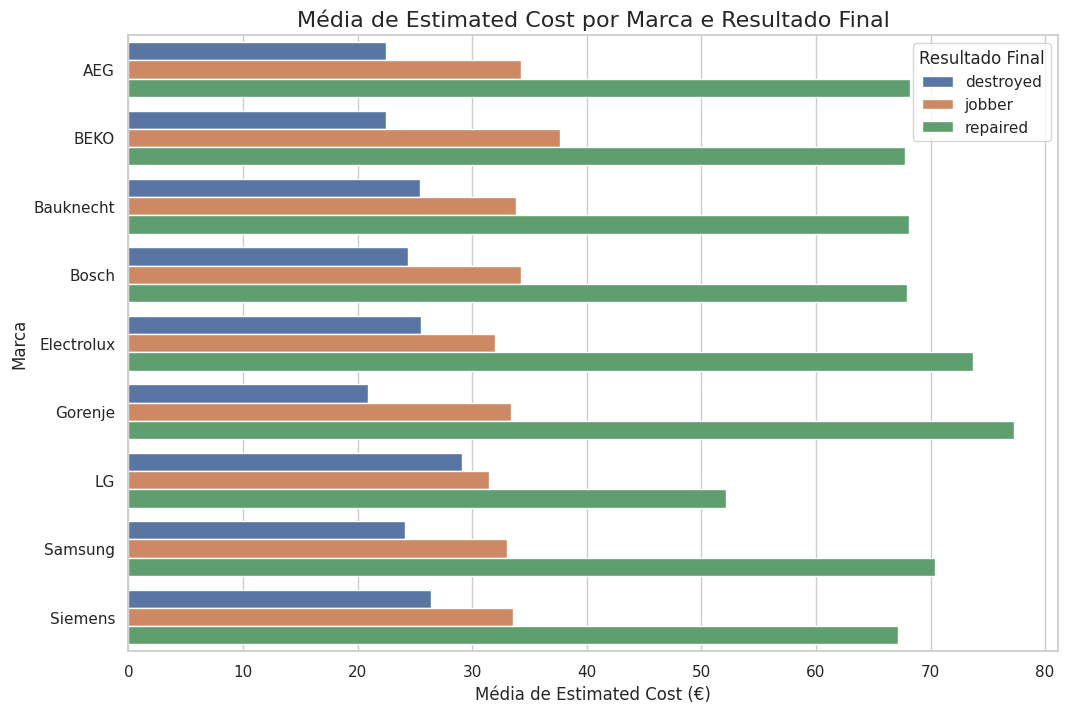

<ipython-input-25-db77ebebcf71>:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='avg_estimated_cost', y='product_type', hue='final_result', data=analysis, ci=None)


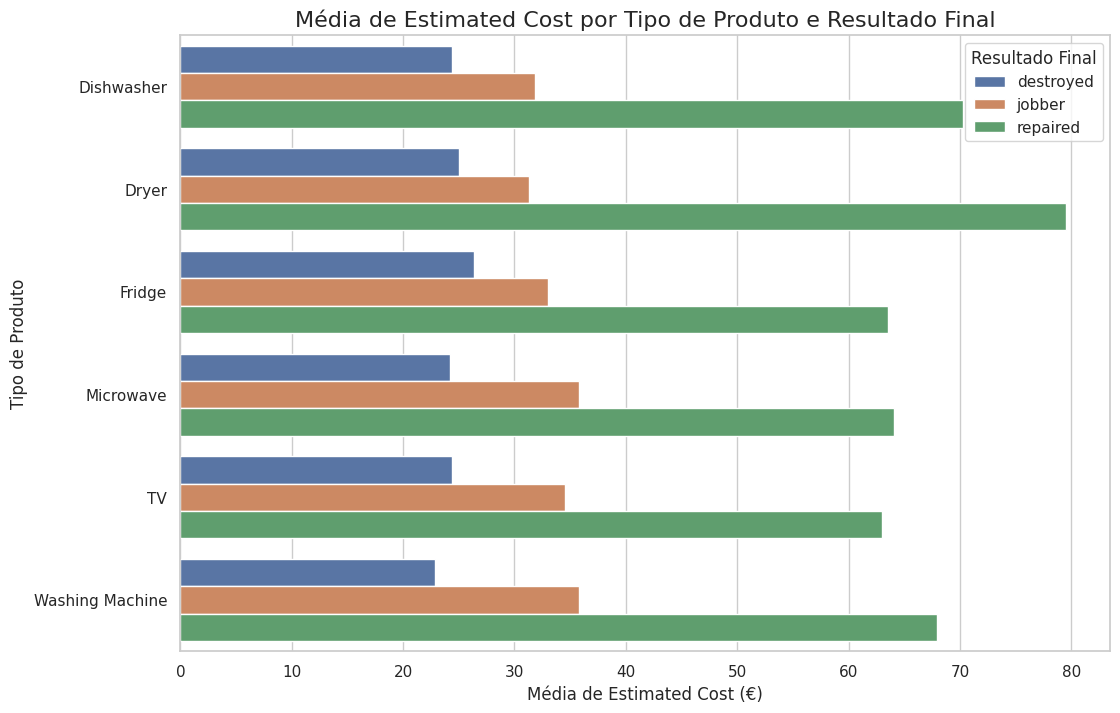

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Primeiro, vamos gerar a análise agrupada como antes
analysis = weekly_df.groupby(['final_result', 'brand', 'product_type']).agg(
    total_estimated_cost=('estimated_cost', 'sum'),  # Total de estimated_cost
    avg_estimated_cost=('estimated_cost', 'mean')  # Média de estimated_cost
).reset_index()

# Configurações de estilo do Seaborn
sns.set(style="whitegrid")

# Gráfico de barras do total de estimated_cost por resultado final, marca e tipo de produto
plt.figure(figsize=(12, 8))
sns.barplot(x='total_estimated_cost', y='brand', hue='final_result', data=analysis, ci=None)
plt.title('Total de Estimated Cost por Marca e Resultado Final', fontsize=16)
plt.xlabel('Total de Estimated Cost (€)', fontsize=12)
plt.ylabel('Marca', fontsize=12)
plt.legend(title='Resultado Final', loc='upper right')
plt.show()

# Gráfico de barras do total de estimated_cost por tipo de produto, marca e resultado final
plt.figure(figsize=(12, 8))
sns.barplot(x='total_estimated_cost', y='product_type', hue='final_result', data=analysis, ci=None)
plt.title('Total de Estimated Cost por Tipo de Produto e Resultado Final', fontsize=16)
plt.xlabel('Total de Estimated Cost (€)', fontsize=12)
plt.ylabel('Tipo de Produto', fontsize=12)
plt.legend(title='Resultado Final', loc='upper right')
plt.show()

# Gráfico de barras da média de estimated_cost por resultado final, marca e tipo de produto
plt.figure(figsize=(12, 8))
sns.barplot(x='avg_estimated_cost', y='brand', hue='final_result', data=analysis, ci=None)
plt.title('Média de Estimated Cost por Marca e Resultado Final', fontsize=16)
plt.xlabel('Média de Estimated Cost (€)', fontsize=12)
plt.ylabel('Marca', fontsize=12)
plt.legend(title='Resultado Final', loc='upper right')
plt.show()

# Gráfico de barras da média de estimated_cost por tipo de produto, marca e resultado final
plt.figure(figsize=(12, 8))
sns.barplot(x='avg_estimated_cost', y='product_type', hue='final_result', data=analysis, ci=None)
plt.title('Média de Estimated Cost por Tipo de Produto e Resultado Final', fontsize=16)
plt.xlabel('Média de Estimated Cost (€)', fontsize=12)
plt.ylabel('Tipo de Produto', fontsize=12)
plt.legend(title='Resultado Final', loc='upper right')
plt.show()

<ipython-input-27-6d9e065b8ca7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status', y='duration', data=status_duration, palette='Blues_d')


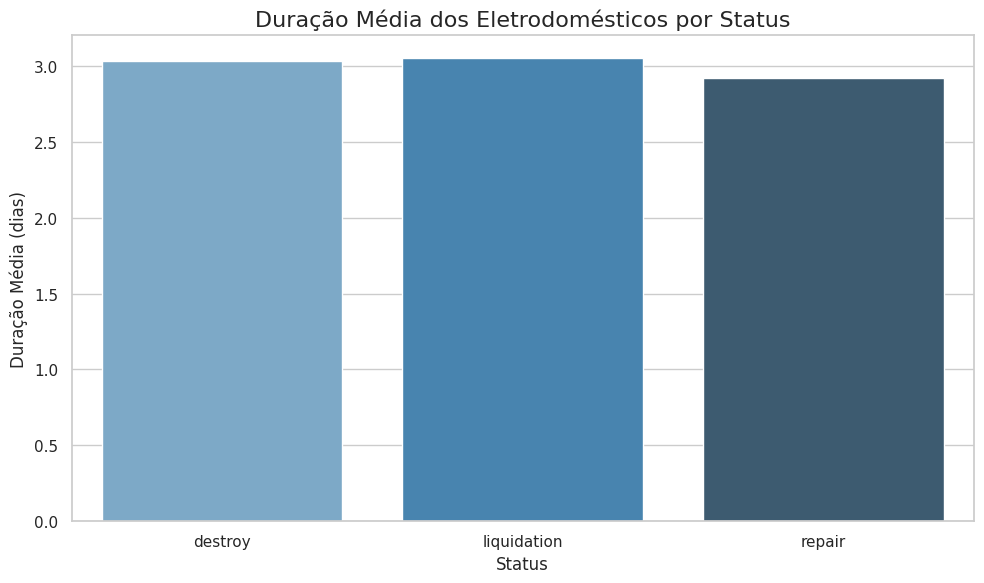

In [ ]:
# Convert 'entry_date' and 'exit_date' to datetime objects
weekly_df['entry_date'] = pd.to_datetime(weekly_df['entry_date'])
weekly_df['exit_date'] = pd.to_datetime(weekly_df['exit_date'])

# Now calculate the duration
weekly_df['duration'] = (weekly_df['exit_date'] - weekly_df['entry_date']).dt.days

# Agrupa os dados por status e calcula a duração média
status_duration = weekly_df.groupby('status')['duration'].mean().reset_index()

# Configurações de estilo do Seaborn
sns.set(style="whitegrid")

# Gráfico de barras para comparar a duração média por status
plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='duration', data=status_duration, palette='Blues_d')

# Títulos e rótulos
plt.title('Duração Média dos Eletrodomésticos por Status', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Duração Média (dias)', fontsize=12)

# Exibe o gráfico
plt.tight_layout()
plt.show()


**Tentativa 6**

In [ ]:
import random
from datetime import datetime, timedelta
import pandas as pd
from faker import Faker

# Inicializa o Faker
fake = Faker()

# Parâmetros fixos
brands = ['BEKO', 'LG', 'Samsung', 'Bosch', 'Electrolux', 'AEG', 'Gorenje', 'Bauknecht', 'Siemens', 'Sony', 'JBL', 'Booser', 'Xiaomi']

white_goods = ['Fridge', 'Dishwasher', 'Washing Machine', 'Dryer', 'Microwave', 'Scooter']  # linha branca
brown_goods = ['TV', 'Projector', 'Sound Bar', 'Home Theater']  # linha marrom

product_types = white_goods + brown_goods

operators = ['SENJICA', 'TOMAS', 'LUIZA', 'MARIO', 'IVANA']
customer_order_prefix = 'XDT1'
customer_ref_prefix = 'LPNXX'
status_options = ['repair', 'destroy', 'liquidation']
status_weights = [0.7, 0.05, 0.25]
status_to_location = {
    'repair': ['WGENG', 'WGASP'],
    'liquidation': ['WGLIQ'],
    'destroy': ['WGDESTROY']
}
result_options = ['repaired', 'jobber']
result_weights = [0.7, 0.3]

def generate_ticket(base_date):
    brand = random.choice(brands)
    product = random.choice(product_types)

    # Definindo a categoria do produto (linha branca ou marrom)
    if product in white_goods:
        category = 'White Goods'
    else:
        category = 'Brown Goods'

    customer_product = fake.bothify(text='BOB?????##')
    our_part = str(fake.random_number(digits=10, fix_len=True))
    serial_number = our_part + str(random.randint(1000000000, 9999999999))
    customer_order = f'{customer_order_prefix}-{random.randint(1000, 9999)}'
    customer_reference = f'{customer_ref_prefix}{random.randint(100000,999999)}'
    operator = random.choice(operators)
    csp = round(random.uniform(100.00, 900.00), 2)
    pallet = random.randint(260000, 270000)
    weight_kg = round(random.uniform(20.0, 70.0), 2)

    entry_date = base_date
    repair_days = random.randint(1, 5)
    exit_date = entry_date + timedelta(days=repair_days)

    status = random.choices(status_options, weights=status_weights)[0]
    location = random.choice(status_to_location[status])
    repair_cost = round(random.uniform(15.0, 120.0), 2)

    if status == 'repair':
        final_result = random.choices(result_options, weights=result_weights)[0]
    elif status == 'destroy':
        final_result = 'destroyed'
    elif status == 'liquidation':
        final_result = 'jobber'

    return {
        'entry_date': entry_date,
        'exit_date': exit_date,
        'brand': brand,
        'product_type': product,
        'category': category,  # nova coluna categoria
        'customer_product': customer_product,
        'our_part': our_part,
        'serial_number': serial_number,
        'customer_order': customer_order,
        'customer_reference': customer_reference,
        'operator': operator,
        'csp': csp,
        'pallet': pallet,
        'weight_kg': weight_kg,
        'status': status,
        'location': location,
        'repair_cost': repair_cost,
        'final_result': final_result
    }

def generate_week_data(min_tickets=250, max_tickets=1000):
    end_date = datetime.today().date()
    bdays = pd.bdate_range(end=end_date, periods=5).date

    records = []

    for base_date in bdays:
        tickets_today = random.randint(min_tickets, max_tickets)
        for _ in range(tickets_today):
            records.append(generate_ticket(base_date))

    df = pd.DataFrame(records)

    df['estimated_cost'] = df.apply(
        lambda row: round(row['repair_cost'], 2) if row['final_result'] == 'repaired' else
                    round(row['repair_cost'] / 2, 2) if row['final_result'] == 'jobber' else
                    round(row['repair_cost'] * 0.375, 2),
        axis=1
    )

    df['repair_cost'] = df['repair_cost'].apply(lambda x: f"€ {x:.2f}".replace('.', ','))
    df['estimated_cost'] = df['estimated_cost'].apply(lambda x: f"€ {x:.2f}".replace('.', ','))

    return df

# Teste
weekly_df = generate_week_data()
print(weekly_df[['product_type', 'category']].head(10))


      product_type     category
0        Sound Bar  Brown Goods
1        Projector  Brown Goods
2          Scooter  White Goods
3          Scooter  White Goods
4           Fridge  White Goods
5  Washing Machine  White Goods
6     Home Theater  Brown Goods
7          Scooter  White Goods
8        Projector  Brown Goods
9               TV  Brown Goods


In [ ]:
print(weekly_df.head())

   entry_date   exit_date      brand product_type     category  \
0  2025-05-21  2025-05-26    Siemens    Sound Bar  Brown Goods   
1  2025-05-21  2025-05-25    Gorenje    Projector  Brown Goods   
2  2025-05-21  2025-05-23     Xiaomi      Scooter  White Goods   
3  2025-05-21  2025-05-22  Bauknecht      Scooter  White Goods   
4  2025-05-21  2025-05-25        JBL       Fridge  White Goods   

  customer_product    our_part         serial_number customer_order  \
0       BOBoFoJH47  3396511355  33965113551852048516      XDT1-1912   
1       BOBJNMcn61  8422071609  84220716091870412329      XDT1-4859   
2       BOBOBXYF70  3136228290  31362282909091660247      XDT1-7965   
3       BOBdzVJq83  4699927501  46999275017101059889      XDT1-6561   
4       BOBhMXis19  4857248249  48572482493409817002      XDT1-5480   

  customer_reference operator     csp  pallet  weight_kg  status location  \
0        LPNXX246076    IVANA  500.01  262161      36.39  repair    WGASP   
1        LPNXX424483  

In [ ]:
weekly_df = generate_week_data()  # Gera o DataFrame com os tickets
weekly_df.to_csv('logistics_tickets_week.csv', index=False, float_format='%.2f')  # Salva como CSV

**Tenativa 7**

In [ ]:
import random
from datetime import datetime, timedelta
import pandas as pd
from faker import Faker

# Inicializa o Faker
fake = Faker()

# Parâmetros fixos
brands = ['BEKO', 'LG', 'Samsung', 'Bosch', 'Electrolux', 'AEG', 'Gorenje', 'Bauknecht', 'Siemens', 'Sony', 'JBL', 'Booser', 'Xiaomi']

white_goods = ['Fridge', 'Dishwasher', 'Washing Machine', 'Dryer', 'Microwave', 'Scooter']  # linha branca
brown_goods = ['TV', 'Projector', 'Sound Bar', 'Home Theater']  # linha marrom

product_types = white_goods + brown_goods

operators = ['SENJICA', 'TOMAS', 'LUIZA', 'MARIO', 'IVANA']
customer_order_prefix = 'XDT1'
customer_ref_prefix = 'LPNXX'
status_options = ['repair', 'destroy', 'liquidation']
status_weights = [0.7, 0.15, 0.15]
status_to_location = {
    'repair': ['WGENG', 'WGASP'],
    'liquidation': ['WGLIQ'],
    'destroy': ['WGDESTROY']
}
# Ajuste: 20% 'jobber', 80% 'repaired'
result_options = ['repaired', 'jobber']
result_weights = [0.7, 0.3]

def generate_ticket(base_date):
    brand = random.choice(brands)
    product = random.choice(product_types)

    category = 'White Goods' if product in white_goods else 'Brown Goods'

    customer_product = fake.bothify(text='BOB?????##')
    our_part = str(fake.random_number(digits=10, fix_len=True))
    serial_number = our_part + str(random.randint(1000000000, 9999999999))
    customer_order = f'{customer_order_prefix}-{random.randint(1000, 9999)}'
    customer_reference = f'{customer_ref_prefix}{random.randint(100000,999999)}'
    operator = random.choice(operators)
    csp = round(random.uniform(100.00, 900.00), 2)
    pallet = random.randint(260000, 270000)
    weight_kg = round(random.uniform(20.0, 70.0), 2)

    entry_date = base_date
    repair_days = random.randint(1, 5)
    exit_date = entry_date + timedelta(days=repair_days)

    status = random.choices(status_options, weights=status_weights)[0]
    location = random.choice(status_to_location[status])
    repair_cost = round(random.uniform(15.0, 120.0), 2)

    if status == 'repair':
        final_result = random.choices(result_options, weights=result_weights)[0]
    elif status == 'destroy':
        final_result = 'destroyed'
    elif status == 'liquidation':
        final_result = 'jobber'

    return {
        'entry_date': entry_date,
        'exit_date': exit_date,
        'brand': brand,
        'product_type': product,
        'category': category,
        'customer_product': customer_product,
        'our_part': our_part,
        'serial_number': serial_number,
        'customer_order': customer_order,
        'customer_reference': customer_reference,
        'operator': operator,
        'csp': csp,
        'pallet': pallet,
        'weight_kg': weight_kg,
        'status': status,
        'location': location,
        'repair_cost': repair_cost,
        'final_result': final_result
    }

def generate_month_data(min_tickets=250, max_tickets=1000):
    end_date = datetime.today().date()
    bdays = pd.bdate_range(end=end_date, periods=22).date  # ~1 mês útil

    records = []

    for base_date in bdays:
        tickets_today = random.randint(min_tickets, max_tickets)
        for _ in range(tickets_today):
            records.append(generate_ticket(base_date))

    df = pd.DataFrame(records)

    df['estimated_cost'] = df.apply(
        lambda row: round(row['repair_cost'], 2) if row['final_result'] == 'repaired' else
                    round(row['repair_cost'] / 2, 2) if row['final_result'] == 'jobber' else
                    round(row['repair_cost'] * 0.375, 2),
        axis=1
    )

    df['repair_cost'] = df['repair_cost'].apply(lambda x: f"€ {x:.2f}".replace('.', ','))
    df['estimated_cost'] = df['estimated_cost'].apply(lambda x: f"€ {x:.2f}".replace('.', ','))

    return df




In [ ]:
# Teste
monthly_df = generate_month_data()
print(monthly_df.head())

   entry_date   exit_date    brand  product_type     category  \
0  2025-04-28  2025-04-30    Bosch     Projector  Brown Goods   
1  2025-04-28  2025-05-02  Gorenje     Projector  Brown Goods   
2  2025-04-28  2025-05-01   Booser            TV  Brown Goods   
3  2025-04-28  2025-04-30      AEG            TV  Brown Goods   
4  2025-04-28  2025-05-03   Xiaomi  Home Theater  Brown Goods   

  customer_product    our_part         serial_number customer_order  \
0       BOBFMKhR94  8637408745  86374087454169711519      XDT1-7113   
1       BOBPlVgi19  3549555690  35495556904959663142      XDT1-2945   
2       BOBOAcsn12  9828455005  98284550051879311424      XDT1-3985   
3       BOBsloBS50  9547404712  95474047122825184918      XDT1-8395   
4       BOBfQazU29  7378545396  73785453962965908726      XDT1-9521   

  customer_reference operator     csp  pallet  weight_kg       status  \
0        LPNXX198904    IVANA  396.43  266705      45.45  liquidation   
1        LPNXX761734    TOMAS  446.3

In [ ]:
monthly_df = generate_month_data()  # Gera o DataFrame com os tickets
monthly_df.to_csv('logistics_tickets_month.csv', index=False, float_format='%.2f')  # Salva como CSV

**Tentativa 8**

In [ ]:
import random
from datetime import datetime, timedelta
import pandas as pd
from faker import Faker
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday

# Inicializa o Faker
fake = Faker()

# Parâmetros fixos
brands = ['BEKO', 'LG', 'Samsung', 'Bosch', 'Electrolux', 'AEG', 'Gorenje', 'Bauknecht', 'Siemens', 'Sony', 'JBL', 'Booser', 'Xiaomi']
white_goods = ['Fridge', 'Dishwasher', 'Washing Machine', 'Dryer', 'Microwave', 'Scooter']
brown_goods = ['TV', 'Projector', 'Sound Bar', 'Home Theater']
product_types = white_goods + brown_goods
operators = ['SENJICA', 'TOMAS', 'LUIZA', 'MARIO', 'IVANA']
customer_order_prefix = 'XDT1'
customer_ref_prefix = 'LPNXX'
status_options = ['repair', 'destroy', 'liquidation']
status_weights = [0.7, 0.05, 0.25]
status_to_location = {
    'repair': ['WGENG', 'WGASP'],
    'liquidation': ['WGLIQ'],
    'destroy': ['WGDESTROY']
}
result_options = ['repaired', 'jobber']
result_weights = [0.7, 0.3]

# Feriados nacionais da Alemanha
class GermanyHolidays2025(AbstractHolidayCalendar):
    rules = [
        Holiday('Neujahr', month=1, day=1, observance=nearest_workday),
        Holiday('Karfreitag', month=4, day=18),
        Holiday('Ostermontag', month=4, day=21),
        Holiday('Tag der Arbeit', month=5, day=1, observance=nearest_workday),
        Holiday('Christi Himmelfahrt', month=5, day=29),
        Holiday('Pfingstmontag', month=6, day=9),
        Holiday('Tag der Deutschen Einheit', month=10, day=3, observance=nearest_workday),
        Holiday('1. Weihnachtstag', month=12, day=25),
        Holiday('2. Weihnachtstag', month=12, day=26),
    ]

def generate_ticket(base_date):
    brand = random.choice(brands)
    product = random.choice(product_types)
    category = 'White Goods' if product in white_goods else 'Brown Goods'
    customer_product = fake.bothify(text='BOB?????##')
    our_part = str(fake.random_number(digits=10, fix_len=True))
    serial_number = our_part + str(random.randint(1000000000, 9999999999))
    customer_order = f'{customer_order_prefix}-{random.randint(1000, 9999)}'
    customer_reference = f'{customer_ref_prefix}{random.randint(100000,999999)}'
    operator = random.choice(operators)
    csp = round(random.uniform(100.00, 900.00), 2)
    pallet = random.randint(260000, 270000)
    weight_kg = round(random.uniform(20.0, 70.0), 2)
    entry_date = base_date
    repair_days = random.randint(1, 5)
    exit_date = entry_date + timedelta(days=repair_days)
    status = random.choices(status_options, weights=status_weights)[0]
    location = random.choice(status_to_location[status])
    repair_cost = round(random.uniform(15.0, 120.0), 2)

    if status == 'repair':
        final_result = random.choices(result_options, weights=result_weights)[0]
    elif status == 'destroy':
        final_result = 'destroyed'
    elif status == 'liquidation':
        final_result = 'jobber'

    return {
        'entry_date': entry_date,
        'exit_date': exit_date,
        'brand': brand,
        'product_type': product,
        'category': category,
        'customer_product': customer_product,
        'our_part': our_part,
        'serial_number': serial_number,
        'customer_order': customer_order,
        'customer_reference': customer_reference,
        'operator': operator,
        'csp': csp,
        'pallet': pallet,
        'weight_kg': weight_kg,
        'status': status,
        'location': location,
        'repair_cost': repair_cost,
        'final_result': final_result
    }

def generate_year_data(min_tickets=250, max_tickets=1000):
    calendar = GermanyHolidays2025()
    holidays = calendar.holidays(start='2025-01-01', end='2025-12-31')

    weekdays = pd.bdate_range(start='2025-01-01', end='2025-12-31')
    weekdays = [d.date() for d in weekdays if d.date() not in holidays]

    records = []
    for base_date in weekdays:
        tickets_today = random.randint(min_tickets, max_tickets)
        for _ in range(tickets_today):
            records.append(generate_ticket(base_date))

    df = pd.DataFrame(records)

    df['estimated_cost'] = df.apply(
        lambda row: round(row['repair_cost'], 2) if row['final_result'] == 'repaired' else
                    round(row['repair_cost'] / 2, 2) if row['final_result'] == 'jobber' else
                    round(row['repair_cost'] * 0.375, 2),
        axis=1
    )

    # Remover o símbolo do euro
    #df['repair_cost'] = df['repair_cost'].apply(lambda x: f"{x:.2f}".replace('.', ','))
    #df['estimated_cost'] = df['estimated_cost'].apply(lambda x: f"{x:.2f}".replace('.', ','))

    return df

# Exemplo de uso:
# df_2025 = generate_year_data()
# print(df_2025.head())


In [ ]:
# Teste
df = generate_year_data()
print(df.head())

   entry_date   exit_date    brand product_type     category customer_product  \
0  2025-01-01  2025-01-02   Xiaomi      Scooter  White Goods       BOBYSldY01   
1  2025-01-01  2025-01-03  Gorenje       Fridge  White Goods       BOBpTKkJ13   
2  2025-01-01  2025-01-03  Samsung   Dishwasher  White Goods       BOBAHxbg62   
3  2025-01-01  2025-01-03       LG    Sound Bar  Brown Goods       BOBnsfKz16   
4  2025-01-01  2025-01-03      JBL    Projector  Brown Goods       BOBLsoBR82   

     our_part         serial_number customer_order customer_reference  \
0  6938927018  69389270184335428460      XDT1-9443        LPNXX197372   
1  7080648235  70806482352535094017      XDT1-2676        LPNXX729886   
2  5514506264  55145062649262948847      XDT1-8760        LPNXX924883   
3  7637872288  76378722888744439480      XDT1-6166        LPNXX647082   
4  7463693681  74636936816878158482      XDT1-7927        LPNXX272045   

  operator    csp  pallet  weight_kg       status   location  repair_cost 


📊 Estatísticas descritivas:
                          entry_date                      exit_date       csp  \
count                         166197                         166197 166197.00   
mean   2025-06-30 00:04:02.776945408  2025-07-02 23:58:49.818227712    498.58   
min              2025-01-01 00:00:00            2025-01-02 00:00:00    100.00   
25%              2025-03-28 00:00:00            2025-04-01 00:00:00    298.02   
50%              2025-06-27 00:00:00            2025-07-01 00:00:00    498.23   
75%              2025-10-02 00:00:00            2025-10-05 00:00:00    698.54   
max              2025-12-31 00:00:00            2026-01-05 00:00:00    900.00   
std                              NaN                            NaN    231.22   

         pallet  weight_kg  repair_cost  estimated_cost  
count 166197.00  166197.00    166197.00       166197.00  
mean  265002.20      44.97        67.45           49.77  
min   260000.00      20.00        15.00            5.64  
25%   262

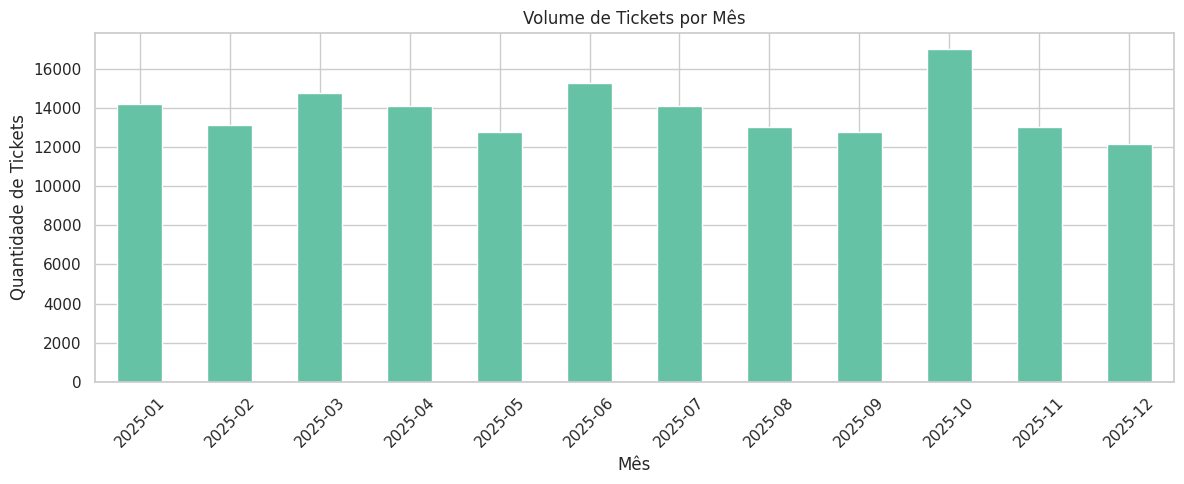

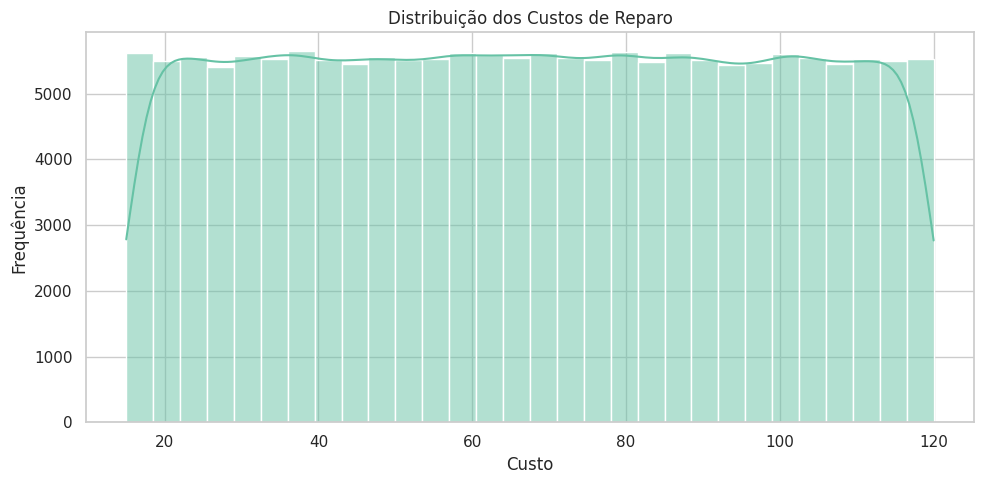

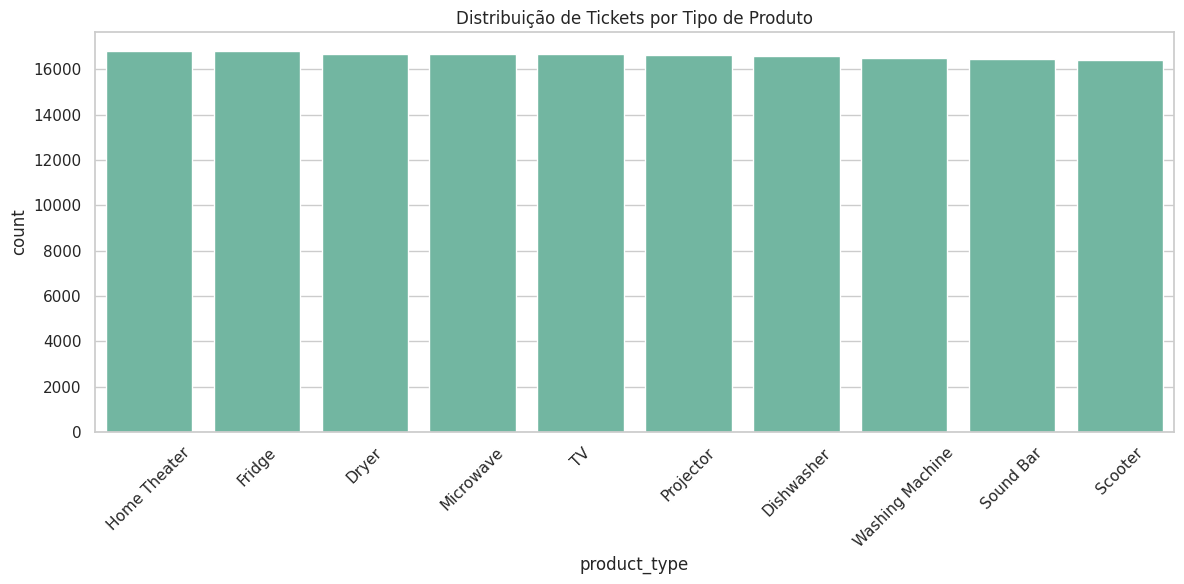

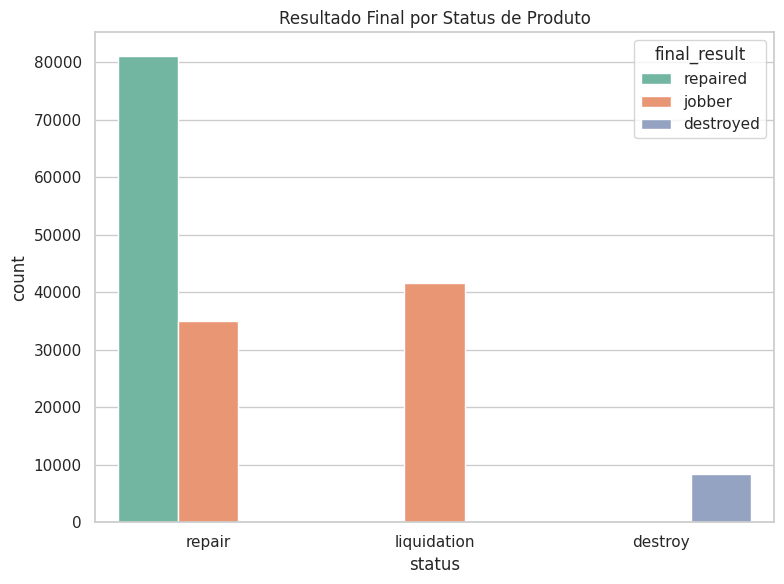

In [ ]:
# 1. Importações
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurações globais
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style='whitegrid', palette='Set2')

# 2. Geração dos dados (assumindo que você tem a função generate_year_data já adaptada)
# from seu_script import generate_year_data  # se estiver separado
df = generate_year_data()  # gera dados de Jan-Dez 2025, dias úteis, sem símbolo de €

# 3. Limpeza e preparação
df['entry_date'] = pd.to_datetime(df['entry_date'])
df['exit_date'] = pd.to_datetime(df['exit_date'])
df['repair_cost'] = df['repair_cost'].astype(float)
df['estimated_cost'] = df['estimated_cost'].astype(float)
df['month'] = df['entry_date'].dt.to_period('M')

# 4. Estatísticas descritivas básicas
print("\n📊 Estatísticas descritivas:")
print(df.describe())

print("\n🔢 Contagem por status:")
print(df['status'].value_counts(normalize=True) * 100)

print("\n📌 Produtos mais frequentes:")
print(df['product_type'].value_counts().head(5))

# 5. KPIs e insights de BI

# KPI 1: Ticket médio (repair_cost)
ticket_medio = df['repair_cost'].mean()
print(f"\n💸 Ticket médio de reparo: {ticket_medio:.2f}")

# KPI 2: Produtos mais reparados
produtos_top = df[df['status'] == 'repair']['product_type'].value_counts().head(5)
print("\n🔧 Produtos mais reparados:")
print(produtos_top)

# KPI 3: Operadores mais ativos
operadores_top = df['operator'].value_counts().head(3)
print("\n👨‍🔧 Operadores com mais tickets:")
print(operadores_top)

# KPI 4: Distribuição por mês
tickets_por_mes = df.groupby('month').size()
print("\n📆 Volume mensal de tickets:")
print(tickets_por_mes)

# KPI 5: Proporção de final_result
print("\n📍 Distribuição do resultado final:")
print(df['final_result'].value_counts(normalize=True) * 100)

# 6. Visualizações

# Gráfico 1: Tickets por mês
plt.figure(figsize=(12, 5))
tickets_por_mes.plot(kind='bar')
plt.title('Volume de Tickets por Mês')
plt.ylabel('Quantidade de Tickets')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico 2: Distribuição de custos de reparo
plt.figure(figsize=(10, 5))
sns.histplot(df['repair_cost'], bins=30, kde=True)
plt.title('Distribuição dos Custos de Reparo')
plt.xlabel('Custo')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

# Gráfico 3: Tickets por tipo de produto
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='product_type', order=df['product_type'].value_counts().index)
plt.title('Distribuição de Tickets por Tipo de Produto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico 4: Resultado final por status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='status', hue='final_result')
plt.title('Resultado Final por Status de Produto')
plt.tight_layout()
plt.show()


In [ ]:
df = generate_year_data()  # Gera o DataFrame com os tickets
df.to_csv('df_year_data.csv', index=False, float_format='%.2f')  # Salva como CSV